#**Python-Sentiment-Analysis-Hugging Face**
###Created by @Anna-portfolio

Natural Language Processing (NLP) project in `Python` for creating sentiment analysis classifier of Hugging Face > Rotten Tomatoes reviews (naive Bayes classifier using scikit-learn, spaCy, Matplotlib)<br><br>
Dataset source: https://huggingface.co/datasets/stanfordnlp/imdb

In [1]:
! pip install datasets
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer


##Preparing Data

In [4]:
# load dataset
data = load_dataset('rotten_tomatoes')

# convert to df object
df = data["train"].to_pandas()
display(df)

# print the number of rows
print(df.count())

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


text     8530
label    8530
dtype: int64


In [5]:
#identify missing values

#find the total of missing values per column
df.isna().sum()

#output: 0, meanining: there are no missing values in dataframe

text     0
label    0
dtype: int64

In [6]:
#duplicates check

#duplicates check (ignoring the 1st row)
df.duplicated()

#output: False, meanining: there are no duplicates in dataframe

0       False
1       False
2       False
3       False
4       False
        ...  
8525    False
8526    False
8527    False
8528    False
8529    False
Length: 8530, dtype: bool

##Cleaning Data

In [8]:
# load model in spaCy (Polish)
spacy_pl = spacy.blank('pl')

# load stop words list
stopwords = spacy_pl.Defaults.stop_words

# function for cleaning text
def clean_text(text):
  # define regex for identifying special characters
  regex = "[.!?/\-_*:\",'()#@#$%^]"
  # change capital letters to lowercase
  text = text.lower()

  # change characters identified by regex into spaces
  text = re.sub(regex, " ", text)

  # change of duplicated spaces into one (in case the actions above generate duplicates)
  text.replace("  ", " ")
  return text

##Tokenization and Lemmatization

In [10]:
# Function to tokenize text (incl. actions for lemma and stopwords)
def tokenize_text(text):
  tokens = spacy_pl(text)
  result = []
  for token in tokens:
    # lemmatization
    lemma = token.lemma_
    if(lemma not in stopwords):
      # add tokens to returned list, if they are not incl. into stopwords
      result.append(lemma)
  return result

# data cleaning using apply()
df["text"] = df["text"].apply(clean_text)

# display of the results
display(df.head())

,text,label
0,the rock is destined to be the 21st century s ...,1
1,the gorgeously elaborate continuation of the...,1
2,effective but too tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,emerges as something rare an issue movie tha...,1


##VECTORIZER

In [12]:
count_vectorize = CountVectorizer(tokenizer=tokenize_text)
vectors = count_vectorize.fit_transform(df["text"])
vectors

vectors.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(8530, 1)

##TRAIN_TEST_SPLIT

In [14]:
print(type(vectors))

# Vectors are by default stored as csr_matrix object
# therefore, to proceed further, it is converted into NumPy array
X = vectors.toarray()

# change the sentiment from the "label" column into ndarray (NumPy array)
y = df["label"].values
# split dataset into train and validation (as train: 90%, valid: 10%)
X_train, X_valid, y_train, y_valid, = train_test_split(X, y, test_size=0.1)

# print length of each of the dataset
print("Dataset split into train and validation (90% / 10%)")
print(X_train.shape[0])
print(y_train.shape[0])

print(X_valid.shape[0])
print(y_valid.shape[0])

<class 'scipy.sparse._csr.csr_matrix'>
Dataset split into train and validation (90% / 10%)
7677
7677
853
853


##Dataset Visualization (Matplotlib)




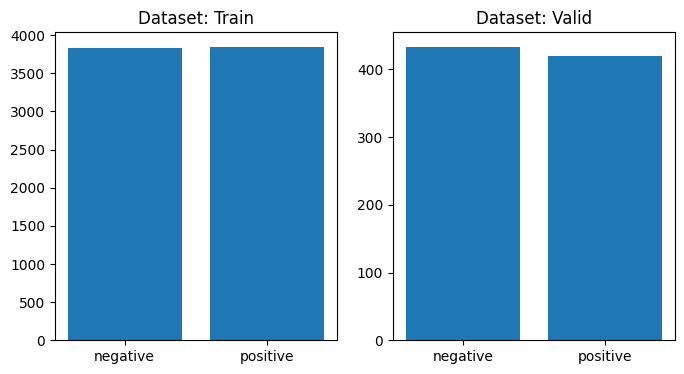

In [16]:
names = ['negative', 'positive']

# set figure 8 by 4
plt.figure(figsize=(8, 4))

# Column chart #1: Dataset: Train
ax = plt.subplot(1, 2, 1)

negative = (y_train == 0).sum()
positive = (y_train == 1).sum()

values = [negative, positive]

ax.set_title('Dataset: Train')
plt.bar(names, values)

# Column chart #2: Dataset: Valid
ax2 = plt.subplot(1, 2, 2)

negative = (y_valid == 0).sum()
positive = (y_valid == 1).sum()

values = [negative, positive]

ax2.set_title('Dataset: Valid')
plt.bar(names, values)

plt.show()

##Naive Bayes classifier (scikit-learn)

In [17]:
# create Naive Bayes model
gnb = GaussianNB()

# Adjust model to train dataset (create examples to get predictions)
gnb.fit(X_train, y_train)
gnb.score(X_valid, y_valid)

0.4912075029308324

##Prediction

In [19]:
# get prediction for the whole dataset
y_pred = gnb.predict(X_valid)

# total of correct predictions
correct = (y_valid == y_pred).sum()
print(f"Recognized {correct}/{X_valid.shape[0]}")
print(f"{correct/X_valid.shape[0] * 100}%")

# process of recognizing an unprocessed text
# vectorize text
text = "One of the best movies I've ever seen!"
print(text)
text = clean_text(text)
vector = count_vectorize.transform([text]).toarray()

# text recognition
result = gnb.predict(vector)

print("0 - negative, 1 - positive")
print(f"Recognized as: {result}")

Recognized 419/853
49.12075029308324%
One of the best movies I've ever seen!
0 - negative, 1 - positive
Recognized as: [1]
